In [1]:
import gensim
import pandas as pd
import pickle

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
filename='preprocessed_data.pkl'

In [3]:
data=pickle.load(open(filename,'rb')) ###open preprocessed data

In [4]:
len(data)

3243

In [5]:
data.head()

,Transcript,AD
0,um young boy getting cookie jar,1
1,and it uh bad shape uh thing,1
2,and picture mother washing dish and see it,1
3,and dish might get falled,1
4,fell fall get it,1


In [6]:
Y= data.iloc[:,1].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
###Manually resolve the tabbed data errors

index = [791,  792,  793,  830,  831,  832,  833,  839,  844, 846, 852,  853,
         855,  858,  860,  876,  882,  890,  892,  904,  909,  912,  936,
         938,  943,  945,  957,  964,  965,  967,  969,  972,  975,  976,
        1000, 1007, 1013, 1018, 1297] 
for i in index:
    Y[i] = 0  ###replace value of selected indices of AD column with 0

idx = [1072, 1101, 1184, 1244]
for i in idx:
    Y[i] = 1  ###replace value of selected indices of AD column with 1
Y = Y.astype(int)

In [9]:
import nltk
from nltk.tokenize import word_tokenize

In [10]:
def create_tokens(data):   ###utility function to create tokens
    sent_tokens =[]
    word_tokens = []
    for i in range(0,len(data)):
        word_tokens.append(word_tokenize(data[i]))
        sent_tokens.append(word_tokens[i])
    return sent_tokens

In [11]:
X=data['Transcript'].tolist()

In [12]:
X=create_tokens(X)  ###created tokens in list of list format to convert words into vectors using gensim 
X

[['um', 'young', 'boy', 'getting', 'cookie', 'jar'],
 ['and', 'it', 'uh', 'bad', 'shape', 'uh', 'thing'],
 ['and', 'picture', 'mother', 'washing', 'dish', 'and', 'see', 'it'],
 ['and', 'dish', 'might', 'get', 'falled'],
 ['fell', 'fall', 'get', 'it'],
 ['and', 'it', 'it', 'picture', 'kitchen', 'window'],
 ['and', 'curtain', 'uh', 'distinct'],
 ['water', 'flow', 'still', 'flowing'],
 ['young', 'boy', 'uh', 'going', 'cookie', 'jar'],
 ['and', 'lit', 'girl', 'young', 'girl'],
 ['and', 'saying', 'boy', 'hard', 'it'],
 ['hardly', 'hard', 'tell', 'anymore'],
 ['uh', 'and', 'c', 'cookie', 'jar'],
 ['and', 'stool', 'and', 'it', 'already', 'starting', 'fall'],
 ['and', 'water', 'sink', 'uh', 'ev', 'overflowing', 'sink'],
 ['hm', 'know', 'hickey'],
 ['whether', 'said'],
 ['uh',
  'like',
  'it',
  'uh',
  'wife',
  'g',
  'mean',
  'uh',
  'mother',
  'near',
  'girl'],
 ['and', 'uh', 'w', 'uh', 'h', 'uh'],
 ['oh', 'uh', 'think'],
 ['uh', 'trying', 'wipe', 'uh', 'wipe', 'dish'],
 ['oh', 'and', '

# CREATE WORD2VEC 

In [13]:
from gensim.models import Word2Vec

In [14]:
word_vectors = Word2Vec(X, window=3, min_count = 1, size = 100, sg= 0) ##training the word2vec model on our transcript data 
                                                                       ##using CBOW model. Dimension of each token is 100
                                                                       ##CBOW is faster to train than Skip gram model

In [15]:
w1="jar"   ##similar words of jar in the dataset
word_vectors.wv.most_similar(w1) 

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('and', 0.9996817111968994),
 ('g', 0.9996803998947144),
 ('it', 0.9996702671051025),
 ('uh', 0.9996311664581299),
 ('one', 0.9996252059936523),
 ('girl', 0.9995830059051514),
 ('boy', 0.9995823502540588),
 ('like', 0.9995819926261902),
 ('did', 0.9995816349983215),
 ('little', 0.9995734691619873)]

In [16]:
word_vectors['cookie'] ##vector for a given word

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-7.27919191e-02,  7.88666803e-05,  1.83752775e-01, -2.68559873e-01,
        9.54406932e-02,  2.52460748e-01, -4.11312729e-01, -4.40411791e-02,
       -3.43903266e-02,  2.85174102e-01, -5.92524558e-02,  5.38761206e-02,
       -3.69329005e-02,  3.33796978e-01, -3.55768234e-01,  1.49422646e-01,
       -1.79023698e-01, -9.41898078e-02,  2.50301450e-01,  1.85376909e-02,
        9.17986259e-02, -1.38650239e-01, -8.82324055e-02,  1.14205897e-01,
        1.25667095e-01,  5.50820231e-02,  3.67079005e-02,  8.13594908e-02,
        1.17960721e-01, -1.12007633e-01, -1.72310069e-01, -1.45336896e-01,
       -1.13436431e-02,  8.32927674e-02, -1.40962094e-01,  2.34979659e-01,
       -6.57365471e-02,  6.11530058e-02, -1.19968779e-01,  7.64704496e-02,
        1.52167782e-01,  3.54475938e-02,  8.33484903e-02,  1.45981550e-01,
        9.65662114e-03,  9.69762430e-02,  1.39025360e-01,  8.74142200e-02,
       -3.36690657e-02, -1.14381537e-01, -2.60838479e-01,  1.31671894e-02,
       -1.40017331e-01, -

In [17]:
word_vectors.wv.similarity("girl",'boy') ###similarity between girl and boy

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9996692

In [18]:
word_vectors.wv.similar_by_word('kitchen')

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('and', 0.9997243881225586),
 ('uh', 0.9996853470802307),
 ('it', 0.9996806979179382),
 ('um', 0.999653697013855),
 ('stool', 0.9996500015258789),
 ('g', 0.9996323585510254),
 ('sink', 0.9996142387390137),
 ('house', 0.9996134638786316),
 ('something', 0.9995716214179993),
 ('door', 0.9995675086975098)]

In [19]:
word_vectors.save('word_vectors.bin') ###save the word vectors for future use

In [20]:
len(word_vectors.wv.vocab) ##number of words in the vocabulary

873

# VISUALIZE WORD EMBEDDINGS 

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def visualize_word_embeddings(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]


    close_words = model.similar_by_word(word)  ###get words similar to the desired words
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)  ###TSNE reduces the dimension from 100 to 2

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(5,5))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00001, x_coords.max()+0.00001)
    plt.ylim(y_coords.min()+0.00001, y_coords.max()+0.00001)
    plt.show()

C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellAp

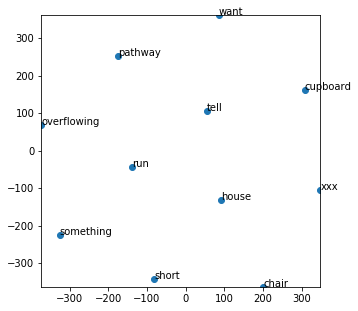

In [23]:
visualize_word_embeddings(word_vectors, 'pathway') ###plot similar words to mother in the dataset


C:\Users\Dellpc\Anaconda2\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


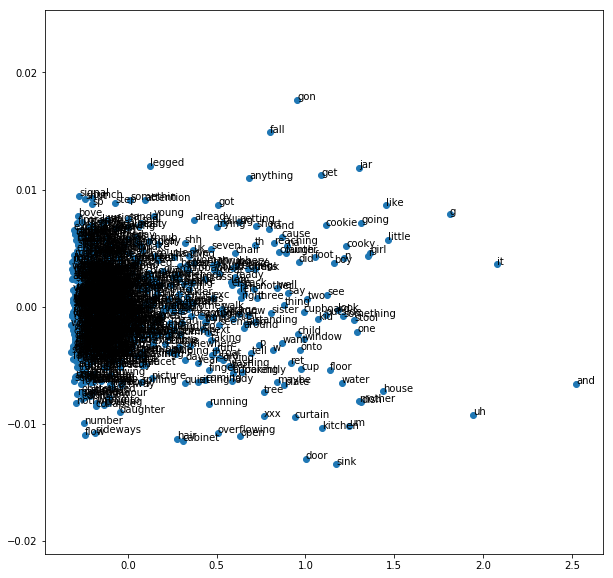

In [24]:
from sklearn.decomposition import PCA
plt.figure(figsize=(10,10))
X = word_vectors[word_vectors.wv.vocab]  ###plot all the words in the dataset
pca = PCA(n_components=2)   
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(word_vectors.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()    ###plot show that mostly words are similar in context and that's true as the transcripts are the description
              ###of the few selected scene. Hence, we can say that our trained word2vec model is working fine